In [454]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import seaborn as sns
from scipy.optimize import curve_fit

# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina' 

pathlib.Path()
pathlib.Path().absolute()
# pathlib.Path('pythontutorial.py').absolute()


PosixPath('/Users/adrianstroth/Documents/Uni/HU Berlin/Computational Physics 2/Project 3 - Time-dependet Schroedinger Equation/TDSE/scripts')

## Stuff to do with data and pandas

In [14]:
# df = pd.read_csv("../data/gauss_wf_wall6_129_1_10_1_3_30_6_1.txt", sep="\t")
# df = pd.read_csv("../data/gauss_wf_wall6_129_1_10_2_3_30_6_1.txt", sep="\t")
# df.shape
# df.info()
# df.head()
# df.describe()

### A function to read in data and make a new dataframe for specific time checks out of it

In [814]:
def create_timecheck_df(nsteps, totaltime, timepercentage, integrator, snapshot):
    '''
    Function that reads in data created by TDSE simulation 
    for given time steps 
    and returns timecheck dataframe
    '''
    
    count=False

    for i in nsteps:
        df = pd.read_csv("../data/gauss_wf_short_wall6_129_{}_{}_{}_3_30_6_1_1000.txt".format(totaltime, i, integrator), sep="\t")
        index = timepercentage * snapshot
#         print(df.head())
        temp_df = pd.DataFrame(df.iloc[[index]])
        temp_df['nsteps'] = i

        if count == False:
            obs_df = pd.DataFrame(temp_df)
#             print("count {}".format(count))
            count = True
        else:
            obs_df = pd.concat([obs_df, temp_df], ignore_index=True)
#             print("count {}".format(count))

        obs_df['Tau'] = totaltime/obs_df['nsteps']
        print("../data/gauss_wf_short_wall6_129_{}_{}_{}_3_30_6_1_1000.txt".format(totaltime, i, integrator))
        
    return obs_df;

def create_timecheck_df_acc(nsteps, acc_exp_list, totaltime, timepercentage, snapshot):
    '''
    Function that reads in data created by TDSE simulation 
    for given time steps 
    and returns timecheck dataframe
    '''
    
    count=False

    for i in acc_exp_list:
        df = pd.read_csv("../data/gauss_wf_accuracy1e-{}_wall6_129_{}_{}_1_3_30_6_1_1000.txt".format(i, totaltime, nsteps), sep="\t")
        index = timepercentage * snapshot
#         print(df.head())
        temp_df = pd.DataFrame(df.iloc[[index]])
        temp_df['accuracy'] = 10**(-i)
        temp_df['nsteps'] = nsteps
        if count == False:
            obs_df = pd.DataFrame(temp_df)
#             print("count {}".format(count))
            count = True
        else:
            obs_df = pd.concat([obs_df, temp_df], ignore_index=True)
#             print("count {}".format(count))

        obs_df['Tau'] = totaltime/obs_df['nsteps']
        
        print("../data/gauss_wf_accuracy1e-{}_wall6_129_{}_{}_1_3_30_6_1_1000.txt".format(i, totaltime, nsteps))
        
    return obs_df;

def poly2(x, a, b, c):
    y = a + b*x + c*x**2
    return y

def poly1(x, a, b):
    y = a + b*x
    return y

def lin_poly2(x, a, b):
    y = a + b*x**2
    return y


## Recovering the same data from multiple data files
### Data for SSM

In [385]:
df = pd.read_csv("../data/gauss_wf_short_wall6_129_200_{}_2_3_30_6_1_1000.txt".format(i), sep="\t")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time              1001 non-null   float64
 1   REAL(psi[n])      1001 non-null   float64
 2   IMAG(psi[n])      1001 non-null   float64
 3   averx             1001 non-null   float64
 4   deltax            1001 non-null   float64
 5   averp             1001 non-null   float64
 6   deltap            1001 non-null   float64
 7   avg_state_energy  1001 non-null   float64
 8   norm(psi)         1001 non-null   float64
dtypes: float64(9)
memory usage: 70.5 KB


In [478]:
nsteps = [  100000 , 200000, 400000, 800000, 1600000, 3200000, 6400000 ]
# nsteps = [100000]
count = False
# time = 0.08
# time_index = 10000
totaltime = 200
timepercentage = 1
snapshot = 1000
# it = 0
for i in nsteps:
    df = pd.read_csv("../data/gauss_wf_short_wall6_129_200_{}_2_3_30_6_1_1000.txt".format(i), sep="\t")
    index = timepercentage * (snapshot)

    temp_df = pd.DataFrame(df.iloc[[index]])
    temp_df['nsteps'] = i

    if count == False:
        ssm_obs_df = pd.DataFrame(temp_df)
        print("count {}".format(count))
        count = True
    else:
        ssm_obs_df = pd.concat([ssm_obs_df, temp_df], ignore_index=True)
        print("count {}".format(count))
        
for observable in ssm_obs_df[2:]:
    print(observable)
    

ssm_obs_df['Tau'] = totaltime/ssm_obs_df['nsteps']
ssm_obs_df


count False
count True
count True
count True
count True
count True
count True
time
REAL(psi[n])
IMAG(psi[n])
averx
deltax
averp
deltap
avg_state_energy
norm(psi)
nsteps


,time,REAL(psi[n]),IMAG(psi[n]),averx,deltax,averp,deltap,avg_state_energy,norm(psi),nsteps,Tau
0,200.0,0.000000e+00,0.0,30.960221,8.273871,-0.832589,0.109510,0.196313,1.0,100000,0.002000
1,200.0,0.000000e+00,0.0,30.960226,8.273890,-0.832589,0.109511,0.196313,1.0,200000,0.001000
2,200.0,0.000000e+00,0.0,30.960228,8.273895,-0.832589,0.109511,0.196313,1.0,400000,0.000500
3,200.0,0.000000e+00,0.0,30.960228,8.273897,-0.832589,0.109512,0.196313,1.0,800000,0.000250
4,200.0,1.000000e-07,0.0,30.960228,8.273897,-0.832589,0.109512,0.196313,1.0,1600000,0.000125
5,200.0,1.000000e-07,0.0,30.960228,8.273897,-0.832589,0.109512,0.196313,1.0,3200000,0.000063
6,200.0,1.000000e-07,0.0,30.960228,8.273897,-0.832589,0.109512,0.196313,1.0,6400000,0.000031


In [863]:
ssm_popt00, _ = curve_fit(lin_poly2, ssm_obs_df.Tau, ssm_obs_df.averx)
ssm_popt10, _ = curve_fit(lin_poly2, ssm_obs_df.Tau, ssm_obs_df.deltax)
ssm_popt01, _ = curve_fit(lin_poly2, ssm_obs_df.Tau, ssm_obs_df.averp)
ssm_popt11, _ = curve_fit(lin_poly2, ssm_obs_df.Tau, ssm_obs_df.deltap)
ssm_popt20, _ = curve_fit(poly1, ssm_obs_df.Tau[:4], ssm_obs_df.avg_state_energy[:4], p0=(0.1963127581552851, 0.0000005), sigma=100/ssm_obs_df.avg_state_energy[:4])

ssm_y00 = lin_poly2(0, *ssm_popt00) 
ssm_y10 = lin_poly2(0, *ssm_popt10) 
ssm_y01 = lin_poly2(0, *ssm_popt01) 
ssm_y11 = lin_poly2(0, *ssm_popt11) 
ssm_y20 = poly1(0, *ssm_popt20)

ssm_y20

0.1963127582235473

### Creating plots 

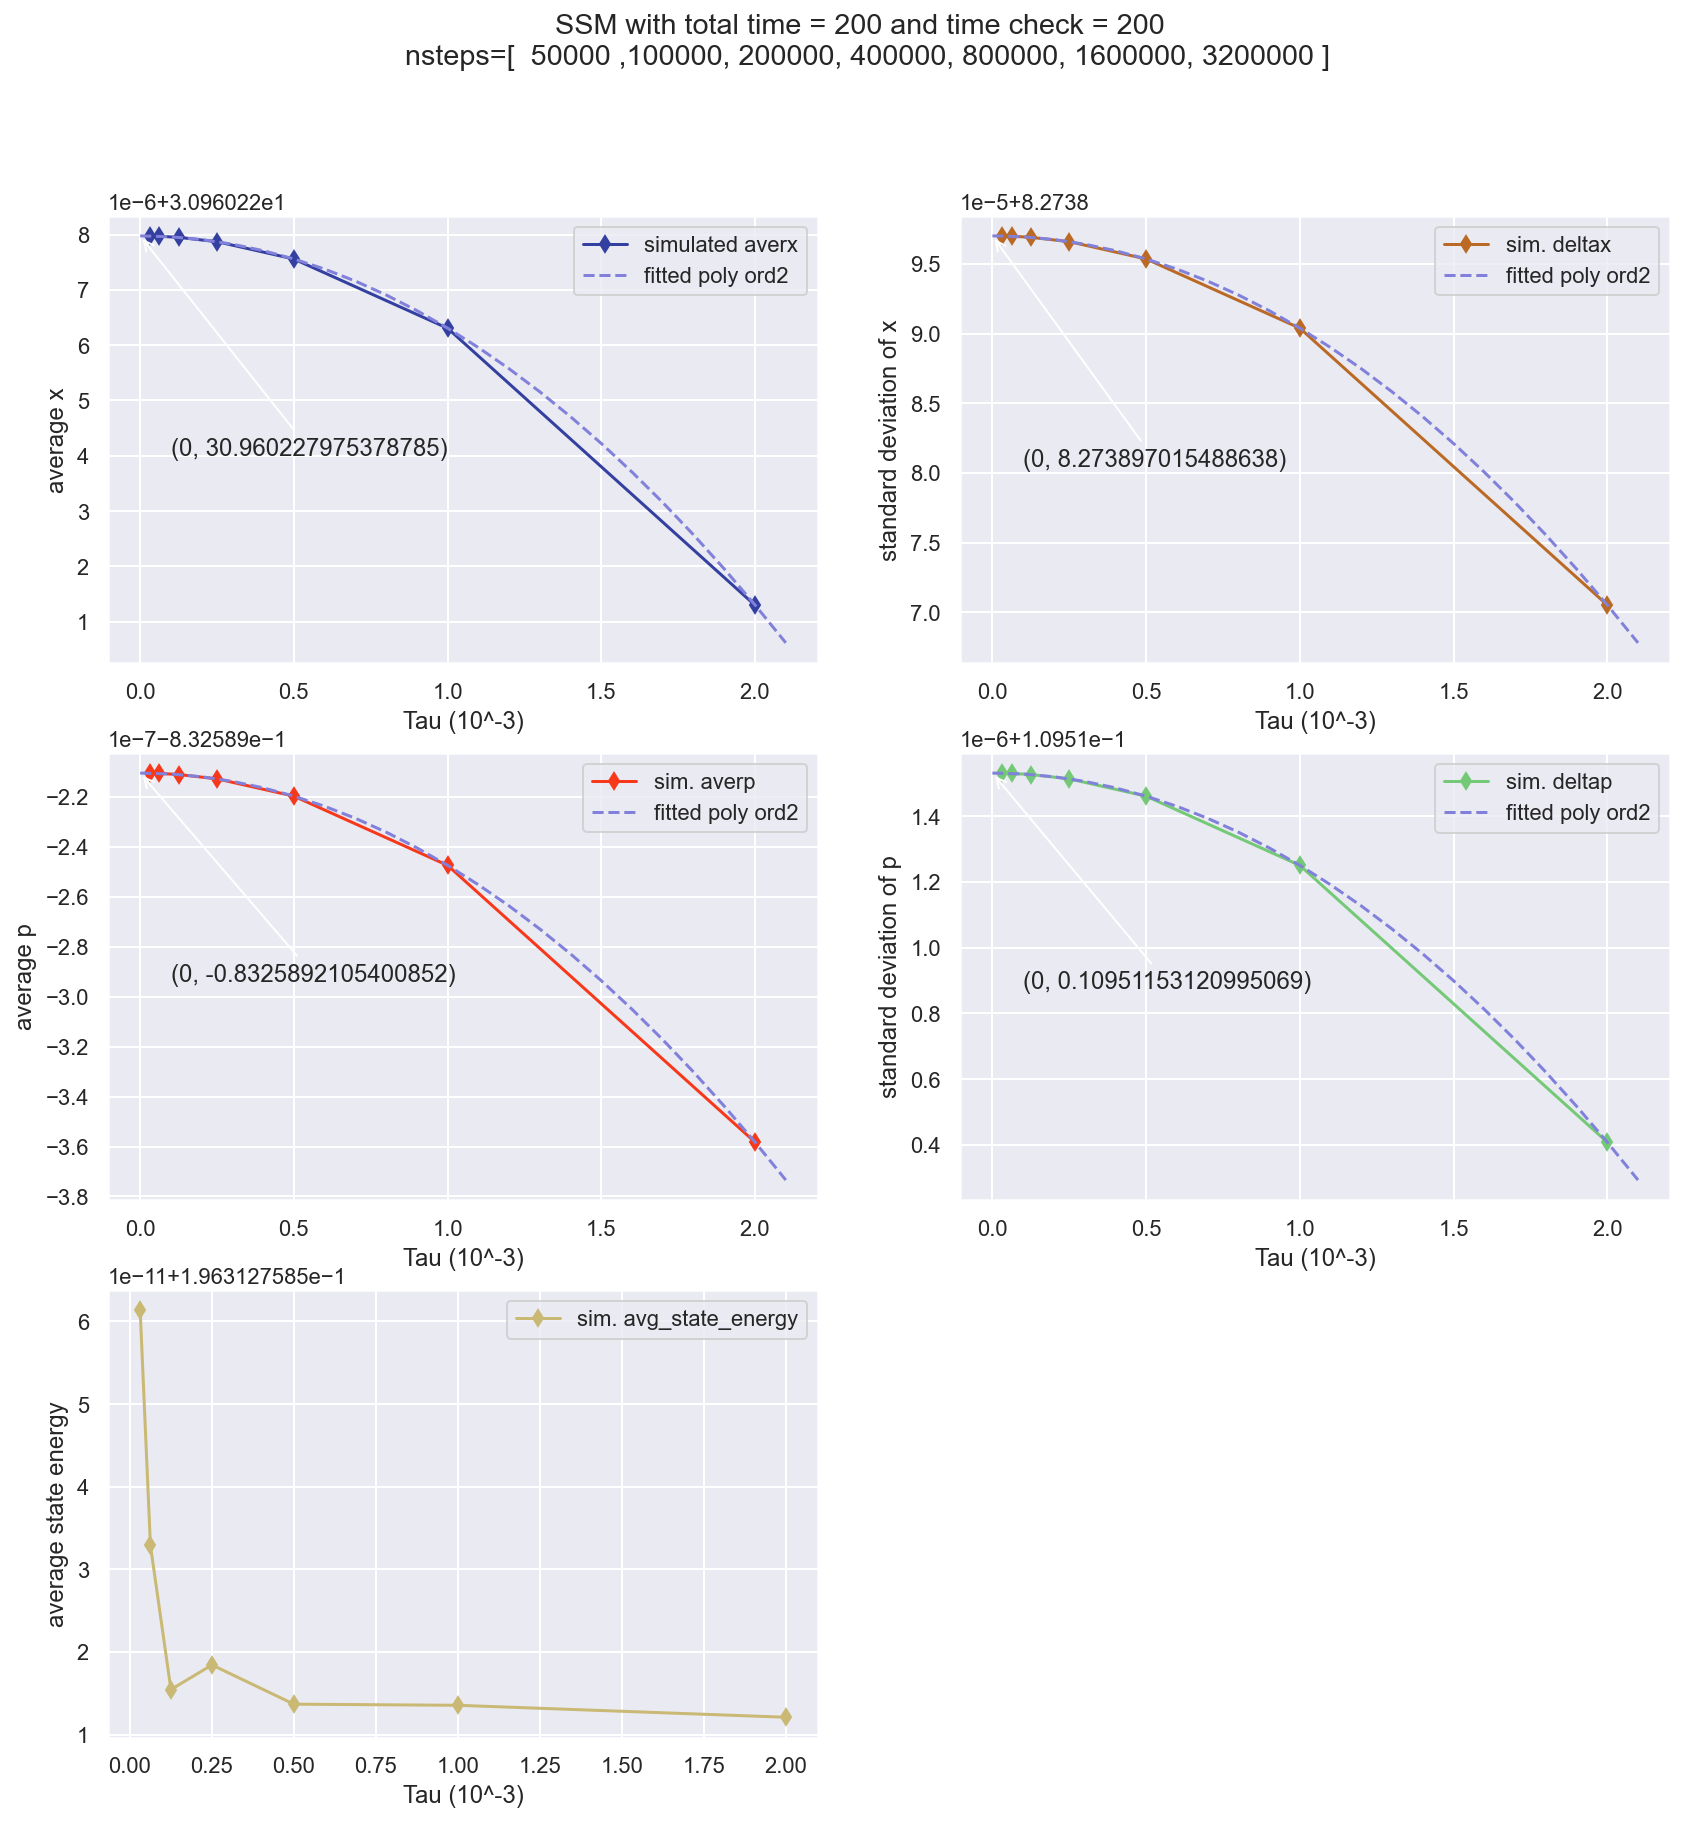

In [865]:
sns.set_theme()

fig = plt.figure(figsize=(14,14))
fig.suptitle('SSM with total time = {} and time check = {} \n nsteps=[  50000 ,100000, 200000, 400000, 800000, 1600000, 3200000 ]'.format(totaltime, totaltime*timepercentage))
fig.tight_layout(pad=4)

ssm_last_tau_value = ssm_obs_df.iloc[0, 10]
ssm_xextra = np.arange(0, ssm_last_tau_value + ssm_last_tau_value * 0.1, 0.0001)

ax1 = plt.subplot(321)
ax1.plot(ssm_obs_df.Tau[:]*10**3, ssm_obs_df.averx[:], label='simulated averx', marker='d', color='#3340a0')
ax1.set_xlabel('Tau (10^-3)')
ax1.set_ylabel('average x')
ax1.plot(ssm_xextra*10**3, lin_poly2(ssm_xextra, *ssm_popt00), label='fitted poly ord2', ls='--', color='#8181db')
ax1.legend()
ax1.annotate('(0, {})'.format(ssm_y00), xy=(0, ssm_y00), xytext=(0.1, 30.960224),arrowprops=dict(arrowstyle='->'))

ax2 = plt.subplot(322)
ax2.plot(ssm_obs_df.Tau*10**3, ssm_obs_df.deltax, label='sim. deltax', marker='d', color='#ba6a25')
ax2.set_xlabel('Tau (10^-3)')
ax2.set_ylabel('standard deviation of x')
ax2.plot(ssm_xextra*10**3, lin_poly2(ssm_xextra, *ssm_popt10), label='fitted poly ord2', ls='--', color='#8181db')
ax2.legend()
ax2.annotate('(0, {})'.format(ssm_y10), xy=(0, ssm_y10), xytext=(0.1, ssm_y10-ssm_y10*2e-6),arrowprops=dict(arrowstyle='->'))

ax3 = plt.subplot(323)
ax3.plot(ssm_obs_df.Tau*10**3, ssm_obs_df.averp, label='sim. averp', marker='d', color='#f7381b')
ax3.set_xlabel('Tau (10^-3)')
ax3.set_ylabel('average p')
ax3.plot(ssm_xextra*10**3, lin_poly2(ssm_xextra, *ssm_popt01), label='fitted poly ord2', ls='--', color='#8181db')
ax3.legend()
ax3.annotate('(0, {})'.format(ssm_y01), xy=(0, ssm_y01), xytext=(0.1, ssm_y01+ssm_y01*1e-7),arrowprops=dict(arrowstyle='->'))

ax4 = plt.subplot(324)
ax4.plot(ssm_obs_df.Tau*10**3, ssm_obs_df.deltap, label='sim. deltap', marker='d', color='#74c976')
ax4.set_xlabel('Tau (10^-3)')
ax4.set_ylabel('standard deviation of p')
ax4.plot(ssm_xextra*10**3, lin_poly2(ssm_xextra, *ssm_popt11), label='fitted poly ord2', ls='--', color='#8181db')
ax4.legend()
ax4.annotate('(0, {})'.format(ssm_y11), xy=(0, ssm_y11), xytext=(0.1, ssm_y11-ssm_y11*6e-6),arrowprops=dict(arrowstyle='->'))

ax5 = plt.subplot(325)
ax5.plot(ssm_obs_df.Tau*10**3, ssm_obs_df.avg_state_energy, label='sim. avg_state_energy', marker='d', color='#c9b974')
ax5.set_xlabel('Tau (10^-3)')
ax5.set_ylabel('average state energy')
# ax5.plot(ssm_xextra*10**3, poly1(ssm_xextra, *ssm_popt20), label='energy extrapolated', ls='--', color='#c9b974')
ax5.legend()
# ax4.annotate('(0, {})'.format(ssm_y20), xy=(0, ssm_y20), xytext=(0.1, ssm_y20+ssm_y20*2e-11),arrowprops=dict(arrowstyle='->'))



# plt.savefig('../plots/SSM_fixed_tt{}_pt{}_final.png'.format(totaltime, totaltime*timepercentage), dpi=300)
plt.show()

### Trying to make it more consise

In [224]:
# list_of_dfs = [pd.read_csv("../data/gauss_wf_wall6_129_1_{}_2_3_30_6_1.txt".format(i), sep="\t") for i in nsteps]
# list_of_dfs[0].head()
# for df in list_of_dfs:
#     temp_df = pd.DataFrame(df.iloc[[-1]])
#     concat_df = pd.concat(temp_df)

### Reading in data for UCM

In [423]:
df = pd.read_csv('../data/gauss_wf_short_wall6_129_200_1600000_1_3_30_6_1_1000.txt', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time              1001 non-null   float64
 1   REAL(psi[n])      1001 non-null   float64
 2   IMAG(psi[n])      1001 non-null   float64
 3   averx             1001 non-null   float64
 4   deltax            1001 non-null   float64
 5   averp             1001 non-null   float64
 6   deltap            1001 non-null   float64
 7   avg_state_energy  1001 non-null   float64
 8   norm(psi)         1001 non-null   float64
dtypes: float64(9)
memory usage: 70.5 KB


In [474]:
ucm_nsteps = [  100000, 200000, 400000, 800000, 1600000, 3200000, 6400000]
ucm_totaltime = 200
ucm_timepercentage = 1
ucm_integrator = 1
ucm_snapshot = 1000

ucm_obs_df = create_timecheck_df(ucm_nsteps, ucm_totaltime, ucm_timepercentage, ucm_integrator, snapshot)
ucm_obs_df

../data/gauss_wf_short_wall6_129_200_100000_1_3_30_6_1_1000.txt
../data/gauss_wf_short_wall6_129_200_200000_1_3_30_6_1_1000.txt
../data/gauss_wf_short_wall6_129_200_400000_1_3_30_6_1_1000.txt
../data/gauss_wf_short_wall6_129_200_800000_1_3_30_6_1_1000.txt
../data/gauss_wf_short_wall6_129_200_1600000_1_3_30_6_1_1000.txt
../data/gauss_wf_short_wall6_129_200_3200000_1_3_30_6_1_1000.txt
../data/gauss_wf_short_wall6_129_200_6400000_1_3_30_6_1_1000.txt


,time,REAL(psi[n]),IMAG(psi[n]),averx,deltax,averp,deltap,avg_state_energy,norm(psi),nsteps,Tau
0,200.0,0.000000e+00,0.0,30.960231,8.273896,-0.832589,0.109512,0.196313,1.0,100000,0.002000
1,200.0,0.000000e+00,0.0,30.960229,8.273897,-0.832589,0.109512,0.196313,1.0,200000,0.001000
2,200.0,0.000000e+00,0.0,30.960228,8.273897,-0.832589,0.109512,0.196313,1.0,400000,0.000500
3,200.0,0.000000e+00,0.0,30.960228,8.273897,-0.832589,0.109512,0.196313,1.0,800000,0.000250
4,200.0,1.000000e-07,0.0,30.960228,8.273897,-0.832589,0.109512,0.196313,1.0,1600000,0.000125
5,200.0,1.000000e-07,0.0,30.960228,8.273897,-0.832589,0.109512,0.196313,1.0,3200000,0.000063
6,200.0,1.000000e-07,0.0,30.960228,8.273897,-0.832589,0.109512,0.196313,1.0,6400000,0.000031


In [843]:
tau4 = ucm_obs_df['Tau'].values[4]
tau5 = ucm_obs_df['Tau'].values[5]
tau6 = ucm_obs_df['Tau'].values[6]
print(tau4, tau5, tau6)

0.000125 6.25e-05 3.125e-05


#### Fitting a function

In [742]:
ucm_popt00, _ = curve_fit(lin_poly2, ucm_obs_df.Tau, ucm_obs_df.averx)
ucm_popt10, _ = curve_fit(lin_poly2, ucm_obs_df.Tau, ucm_obs_df.deltax)
ucm_popt01, _ = curve_fit(lin_poly2, ucm_obs_df.Tau, ucm_obs_df.averp, p0=[-0.8325892105521485, 0.0000700000000000029], sigma=100/ucm_obs_df.averp)
# ucm_popt01, _ = curve_fit(lin_poly2, ucm_obs_df.Tau, ucm_obs_df.averp, sigma=100/ucm_obs_df.averp)
ucm_popt11, _ = curve_fit(lin_poly2, ucm_obs_df.Tau, ucm_obs_df.deltap, p0=[0.109515, 0.000500000000002], sigma=100/ucm_obs_df.deltap)
ucm_popt20, _ = curve_fit(lin_poly2, ucm_obs_df.Tau, ucm_obs_df.avg_state_energy)

ucm_y00 = lin_poly2(0, *ucm_popt00) 
ucm_y10 = lin_poly2(0, *ucm_popt10) 
ucm_y01 = lin_poly2(0, *ucm_popt01) 
ucm_y11 = lin_poly2(0, *ucm_popt11) 
ucm_popt10

/opt/anaconda3/envs/python37/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


array([ 8.27389701, -0.15658323])

In [739]:
y1 = ucm_obs_df['deltap'].values[1]
y2 = ucm_obs_df['deltap'].values[2]
init = ucm_obs_df['deltap'].values[5]

print(init)
print(y1,y2)
val = np.sqrt( (y1-y2)**2 + (ucm_obs_df['Tau'].values[1]-ucm_obs_df['Tau'].values[2])**2 )
val

0.1095115310978283
0.10951153120289654 0.1095115311238884


0.0005000000000000062

### Plotting UCM data
#### trying slightly different plotting call

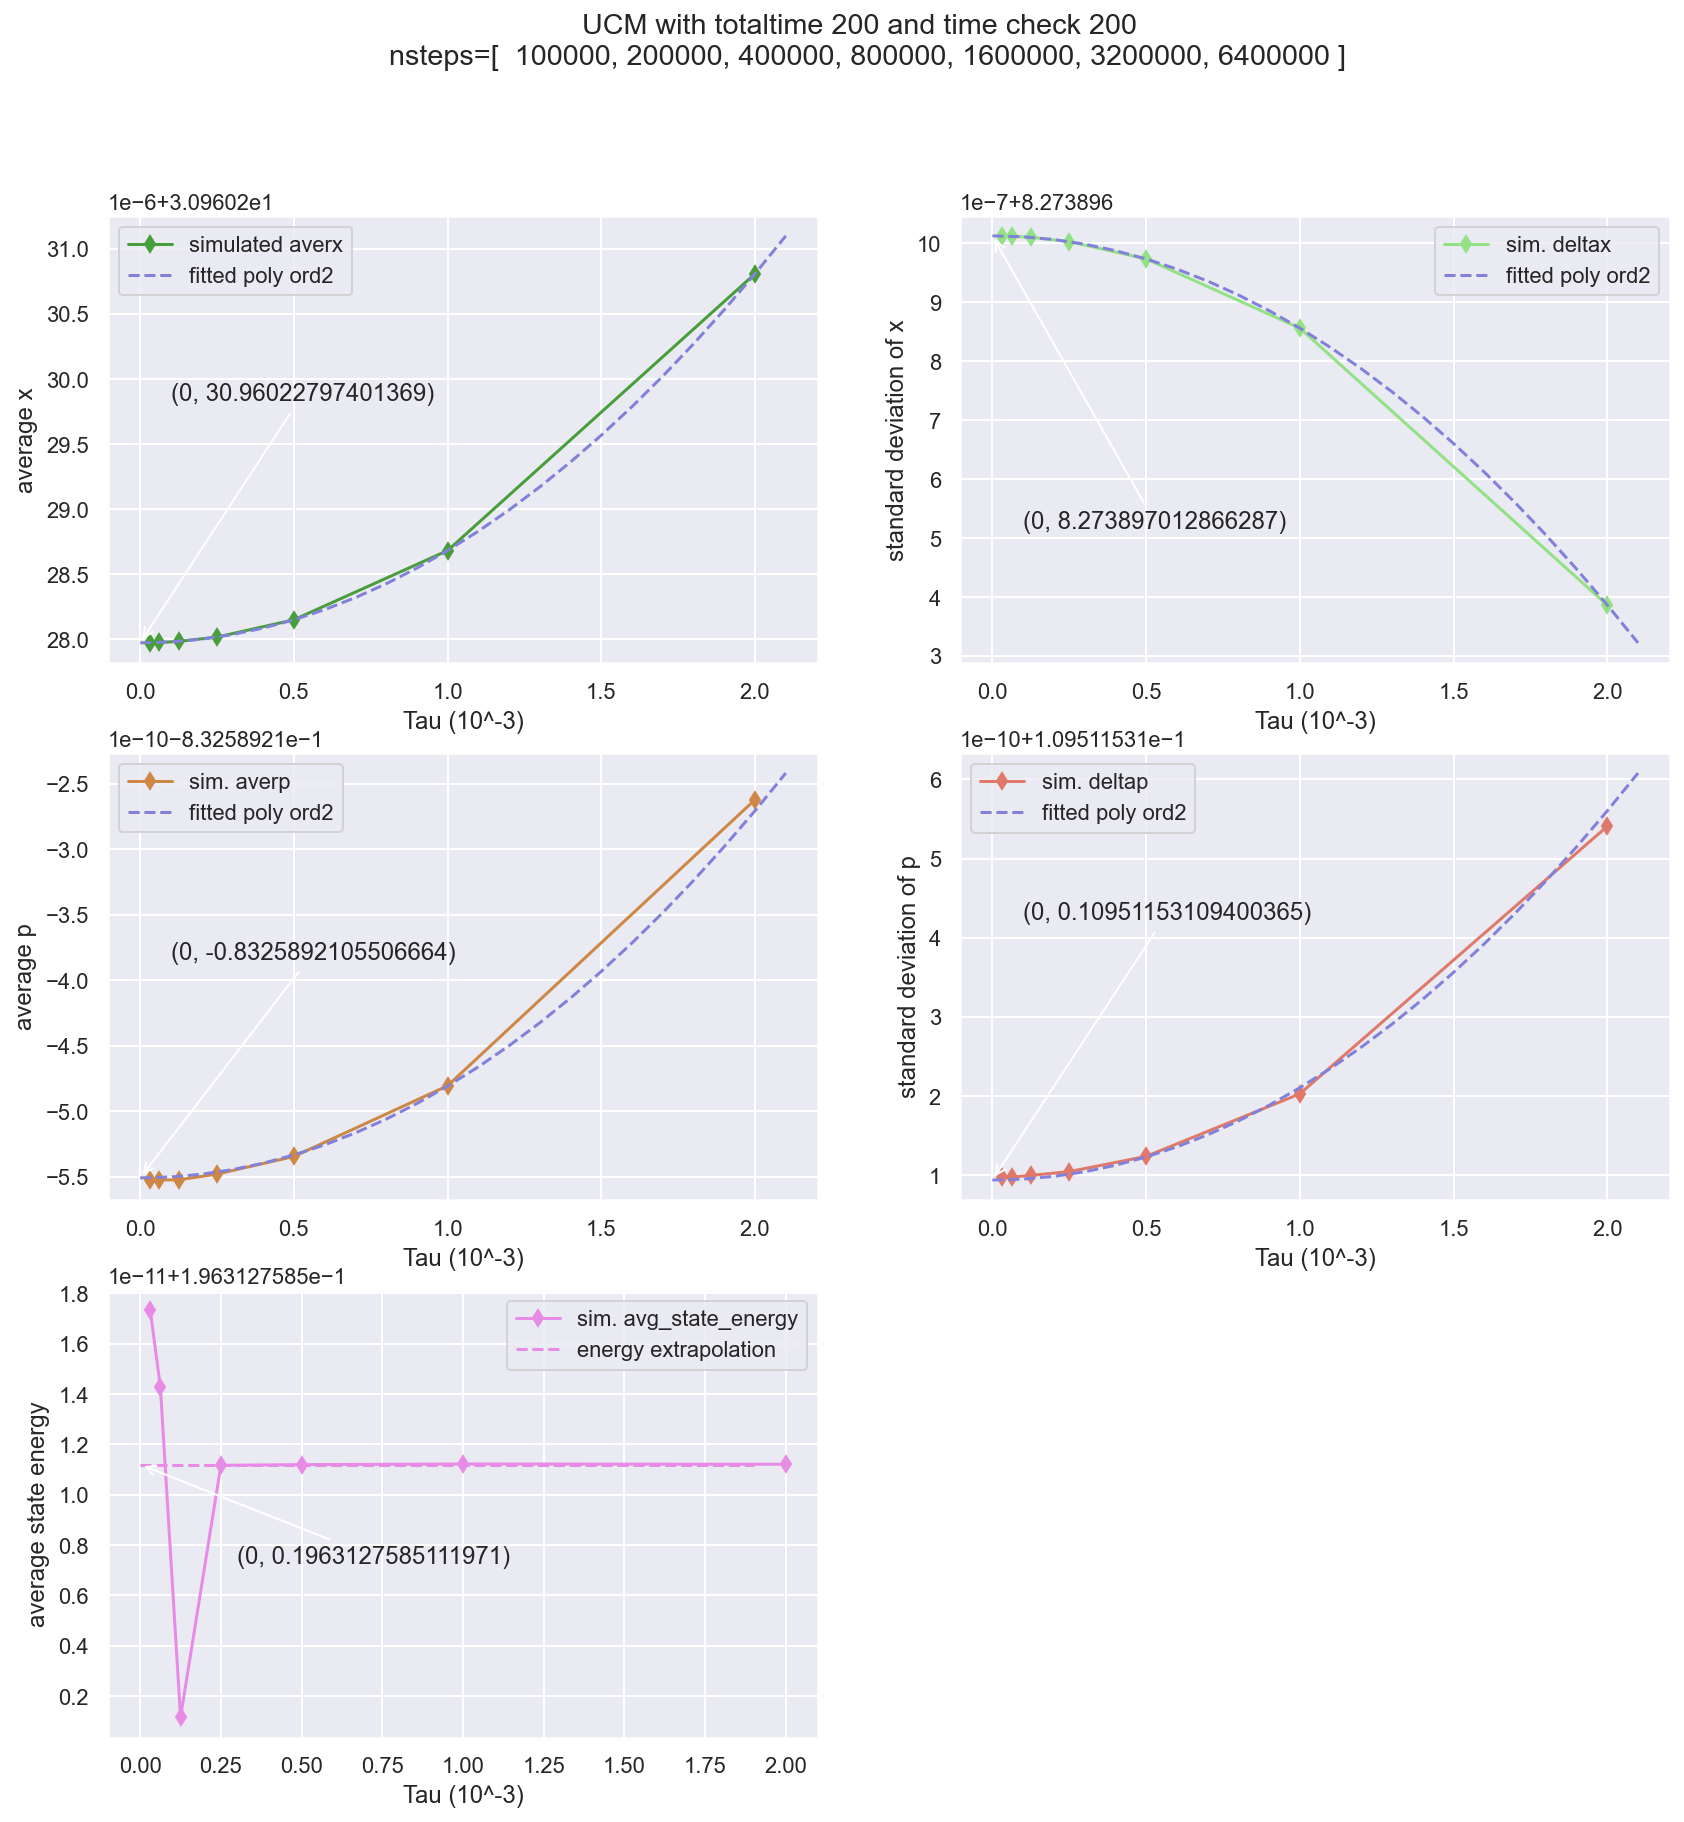

In [866]:
fig_ucm = plt.figure( figsize=(14,14))
fig_ucm.suptitle('UCM with totaltime {} and time check {} \n nsteps=[  100000, 200000, 400000, 800000, 1600000, 3200000, 6400000 ]'.format(ucm_totaltime, ucm_totaltime*ucm_timepercentage))
fig_ucm.tight_layout(pad=3)

last_tau_value = ucm_obs_df.iloc[0, 10]
xextra = np.arange(0, last_tau_value + last_tau_value * 0.1, 0.0001)

energy_val = ucm_obs_df['avg_state_energy'].values[2]
energy_x = np.arange(0, 2, 0.1)
energy_y = np.full((len(energy_x),), energy_val)

ax_ucm1 = plt.subplot(321)
ax_ucm1.plot(ucm_obs_df.Tau*10**3, ucm_obs_df.averx, label='simulated averx', marker='d',color='#479e3a')
ax_ucm1.set(xlabel='Tau (10^-3)', ylabel='average x')
ax_ucm1.plot(xextra*10**3, lin_poly2(xextra, *ucm_popt00), label='fitted poly ord2', ls='--', color='#8181db')
ax_ucm1.legend()
ax_ucm1.annotate('(0, {})'.format(ucm_y00), xy=(0, ucm_y00), xytext=(0.1, ucm_y00+ucm_y00*6e-8),arrowprops=dict(arrowstyle='->'))

ax_ucm2 = plt.subplot(322)
ax_ucm2.plot(ucm_obs_df.Tau*10**3, ucm_obs_df.deltax, label='sim. deltax', marker='d', color='#92e285')
ax_ucm2.set(xlabel='Tau (10^-3)', ylabel='standard deviation of x')
ax_ucm2.plot(xextra*10**3, lin_poly2(xextra, *ucm_popt10), label='fitted poly ord2', ls='--', color='#8181db')
ax_ucm2.legend()
ax_ucm2.annotate('(0, {})'.format(ucm_y10), xy=(0, ucm_y10), xytext=(0.1, ucm_y10-ucm_y10*6e-8),arrowprops=dict(arrowstyle='->'))

ax_ucm3 = plt.subplot(323)
ax_ucm3.plot(ucm_obs_df.Tau*10**3, ucm_obs_df.averp, label='sim. averp', marker='d', color='#ce8744')
ax_ucm3.set(xlabel='Tau (10^-3)', ylabel='average p')
ax_ucm3.plot(xextra*10**3, lin_poly2(xextra, *ucm_popt01), label='fitted poly ord2', ls='--', color='#8181db')
ax_ucm3.legend()
ax_ucm3.annotate('(0, {})'.format(ucm_y01), xy=(0, ucm_y01), xytext=(0.1, ucm_y01-ucm_y01*2e-10),arrowprops=dict(arrowstyle='->'))

ax_ucm4 = plt.subplot(324)
ax_ucm4.plot(ucm_obs_df.Tau*10**3, ucm_obs_df.deltap, label='sim. deltap', marker='d', color='#e07969')
ax_ucm4.set(xlabel='Tau (10^-3)', ylabel='standard deviation of p')
ax_ucm4.plot(xextra*10**3, lin_poly2(xextra, *ucm_popt11), label='fitted poly ord2', ls='--', color='#8181db')
ax_ucm4.legend()
ax_ucm4.annotate('(0, {})'.format(ucm_y11), xy=(0, ucm_y11), xytext=(0.1, ucm_y11+ucm_y11*3e-9),arrowprops=dict(arrowstyle='->'))


ax_ucm5 = plt.subplot(325)
ax_ucm5.plot(ucm_obs_df.Tau*10**3, ucm_obs_df.avg_state_energy, label='sim. avg_state_energy', marker='d', color='#e88be6')
ax_ucm5.set(xlabel='Tau (10^-3)', ylabel='average state energy')
# ax_ucm[2, 0].plot(xextra*10**3, poly2(xextra, *ucm_popt20), label='fitted poly ord2', ls='--', color='#8181db')
ax_ucm5.plot(energy_x, energy_y, ls='--', label='energy extrapolation' ,color='#e88be6')
ax_ucm5.legend()
ax_ucm5.annotate('(0, {})'.format(energy_val), xy=(0, energy_val), xytext=(0.3, energy_val-energy_val*2e-11),arrowprops=dict(arrowstyle='->'))



plt.savefig('../plots/UCM_fixed_tt{}_pt{}_final.png'.format(ucm_totaltime, ucm_totaltime*ucm_timepercentage), dpi=300)
plt.show()

### Reading in data for Euler

In [837]:
euler_nsteps = [ 100000, 200000, 400000, 800000, 1600000, 3200000, 6400000 ]
euler_totaltime = 200
euler_timepercentage = 1
euler_integrator = 0
snapshot = 1000

euler_obs_df = create_timecheck_df(euler_nsteps, euler_totaltime, euler_timepercentage, euler_integrator, snapshot)
euler_obs_df.head()

../data/gauss_wf_short_wall6_129_200_100000_0_3_30_6_1_1000.txt
../data/gauss_wf_short_wall6_129_200_200000_0_3_30_6_1_1000.txt
../data/gauss_wf_short_wall6_129_200_400000_0_3_30_6_1_1000.txt
../data/gauss_wf_short_wall6_129_200_800000_0_3_30_6_1_1000.txt
../data/gauss_wf_short_wall6_129_200_1600000_0_3_30_6_1_1000.txt
../data/gauss_wf_short_wall6_129_200_3200000_0_3_30_6_1_1000.txt
../data/gauss_wf_short_wall6_129_200_6400000_0_3_30_6_1_1000.txt


,time,REAL(psi[n]),IMAG(psi[n]),averx,deltax,averp,deltap,avg_state_energy,norm(psi),nsteps,Tau
0,200.0,0.000000e+00,0.0,31.446289,9.212079,-0.820912,0.169237,0.294927,1.015239,100000,0.002000
1,200.0,1.000000e-07,0.0,30.951608,8.273797,-0.832690,0.109540,0.197962,1.003953,200000,0.001000
2,200.0,0.000000e+00,0.0,30.955856,8.273722,-0.832640,0.109521,0.197124,1.001973,400000,0.000500
3,200.0,0.000000e+00,0.0,30.958041,8.273808,-0.832615,0.109516,0.196718,1.000986,800000,0.000250
4,200.0,1.000000e-07,0.0,30.959134,8.273852,-0.832602,0.109514,0.196515,1.000493,1600000,0.000125


In [838]:
euler_popt1, _ = curve_fit(poly1, euler_obs_df.Tau[1:], euler_obs_df.averx[1:])
euler_popt2, _ = curve_fit(poly1, euler_obs_df.Tau[2:], euler_obs_df.deltax[2:])
euler_popt3, _ = curve_fit(poly1, euler_obs_df.Tau[1:], euler_obs_df.averp[1:])
euler_popt4, _ = curve_fit(poly1, euler_obs_df.Tau[1:], euler_obs_df.deltap[1:])
euler_popt5, _ = curve_fit(poly1, euler_obs_df.Tau[1:], euler_obs_df.avg_state_energy[1:])

euler_y1 = poly1(0, *euler_popt1) 
euler_y2 = poly1(0, *euler_popt2) 
euler_y3 = poly1(0, *euler_popt3) 
euler_y4 = poly1(0, *euler_popt4)
euler_y5 = poly1(0, *euler_popt5)

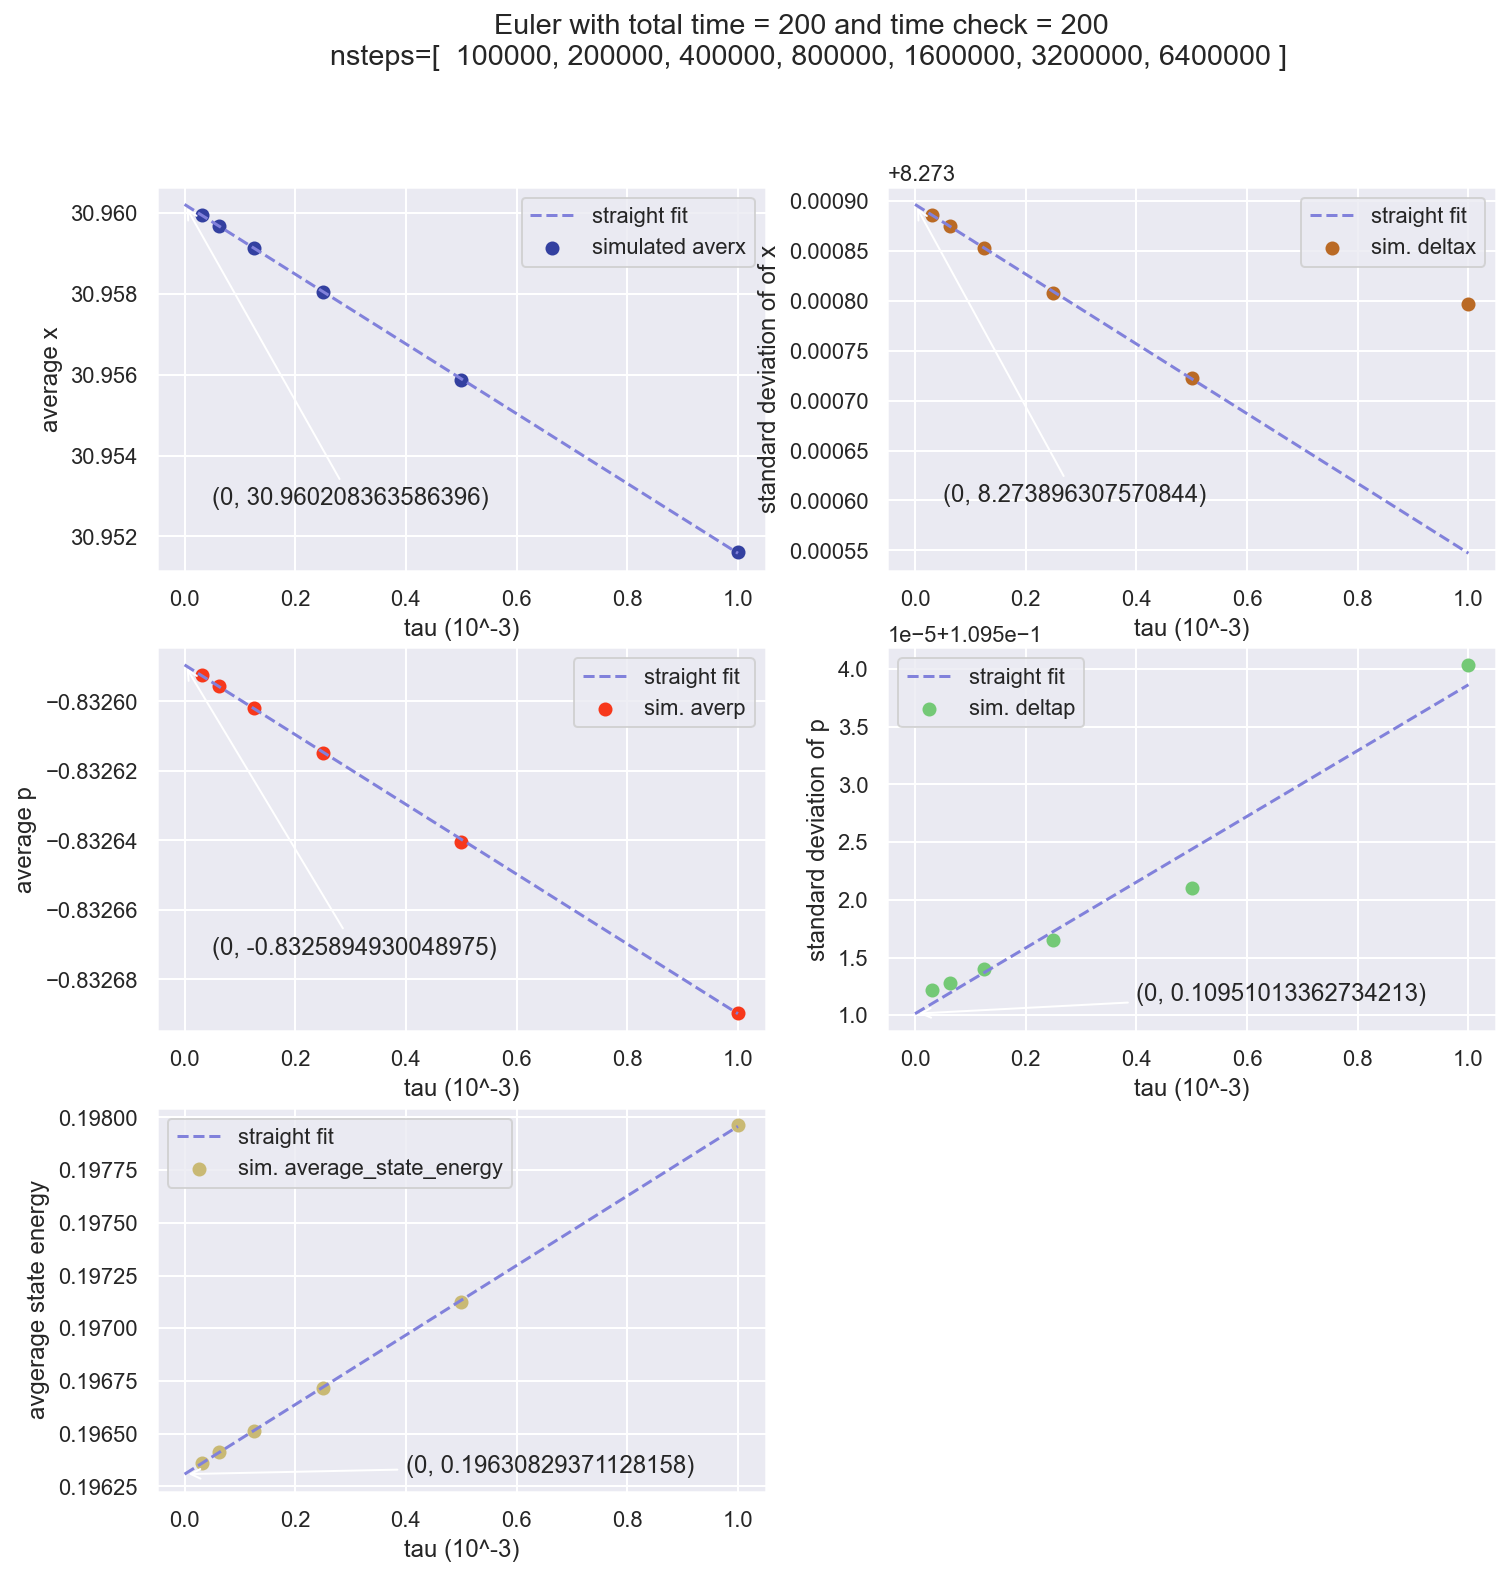

In [842]:
sns.set_theme()

fig = plt.figure(figsize=(12,12))
fig.suptitle('Euler with total time = {} and time check = {} \n nsteps=[  100000, 200000, 400000, 800000, 1600000, 3200000, 6400000 ]'.format(euler_totaltime, euler_totaltime*euler_timepercentage))
fig.tight_layout(pad=3)

euler_last_tau_value = euler_obs_df.iloc[1, 10]
euler_xextra = np.arange(0, euler_last_tau_value + euler_last_tau_value * 0.1, 0.0001)

ax1 = plt.subplot(321)
ax1.scatter(euler_obs_df.Tau[1:]*10**3, euler_obs_df.averx[1:], label='simulated averx', color='#3340a0')
ax1.set(xlabel='tau (10^-3)', ylabel='average x')
ax1.plot(euler_xextra*10**3, poly1(euler_xextra, *euler_popt1), label='straight fit', ls='--', color='#8181db')
ax1.legend()
ax1.annotate('(0, {})'.format(euler_y1), xy=(0, euler_y1), xytext=(0.05, euler_y1-euler_y1*2.4e-4),arrowprops=dict(arrowstyle='->'))
                                                     
ax2 = plt.subplot(322)
ax2.scatter(euler_obs_df.Tau[1:]*10**3, euler_obs_df.deltax[1:], label='sim. deltax', color='#ba6a25')
ax2.set(xlabel='tau (10^-3)', ylabel='standard deviation of of x')
ax2.plot(euler_xextra*10**3, poly1(euler_xextra, *euler_popt2), label='straight fit', ls='--', color='#8181db')
ax2.legend()
ax2.annotate('(0, {})'.format(euler_y2), xy=(0, euler_y2), xytext=(0.05, euler_y2-euler_y2*3.6e-5),arrowprops=dict(arrowstyle='->'))

ax3 = plt.subplot(323)
ax3.scatter(euler_obs_df.Tau[1:]*10**3, euler_obs_df.averp[1:], label='sim. averp', color='#f7381b')
ax3.set(xlabel='tau (10^-3)', ylabel='average p')
ax3.plot(euler_xextra*10**3, poly1(euler_xextra, *euler_popt3), label='straight fit', ls='--', color='#8181db')
ax3.legend()
ax3.annotate('(0, {})'.format(euler_y3), xy=(0, euler_y3), xytext=(0.05, euler_y3+euler_y3*1e-4),arrowprops=dict(arrowstyle='->'))

ax4 = plt.subplot(324)
ax4.scatter(euler_obs_df.Tau[1:]*10**3, euler_obs_df.deltap[1:], label='sim. deltap', color='#74c976')
ax4.set(xlabel='tau (10^-3)', ylabel='standard deviation of p')
ax4.plot(euler_xextra*10**3, poly1(euler_xextra, *euler_popt4), label='straight fit', ls='--', color='#8181db')
ax4.legend()
ax4.annotate('(0, {})'.format(euler_y4), xy=(0, euler_y4), xytext=(0.4, euler_y4+euler_y4*1e-5),arrowprops=dict(arrowstyle='->'))


ax5 = plt.subplot(325)
ax5.scatter(euler_obs_df.Tau[1:]*10**3, euler_obs_df.avg_state_energy[1:], label='sim. average_state_energy', color='#c9b974')
ax5.set(xlabel='tau (10^-3)', ylabel='avgerage state energy')
ax5.plot(euler_xextra*10**3, poly1(euler_xextra, *euler_popt5), label='straight fit', ls='--', color='#8181db')
ax5.legend()
ax5.annotate('(0, {})'.format(euler_y5), xy=(0, euler_y5), xytext=(0.4, euler_y5+euler_y5*3e-5),arrowprops=dict(arrowstyle='->'))



plt.savefig('../plots/Euler_fixed_tt{}_pt{}_final.pdf'.format(euler_totaltime, euler_totaltime*euler_timepercentage), dpi=300)
plt.show()

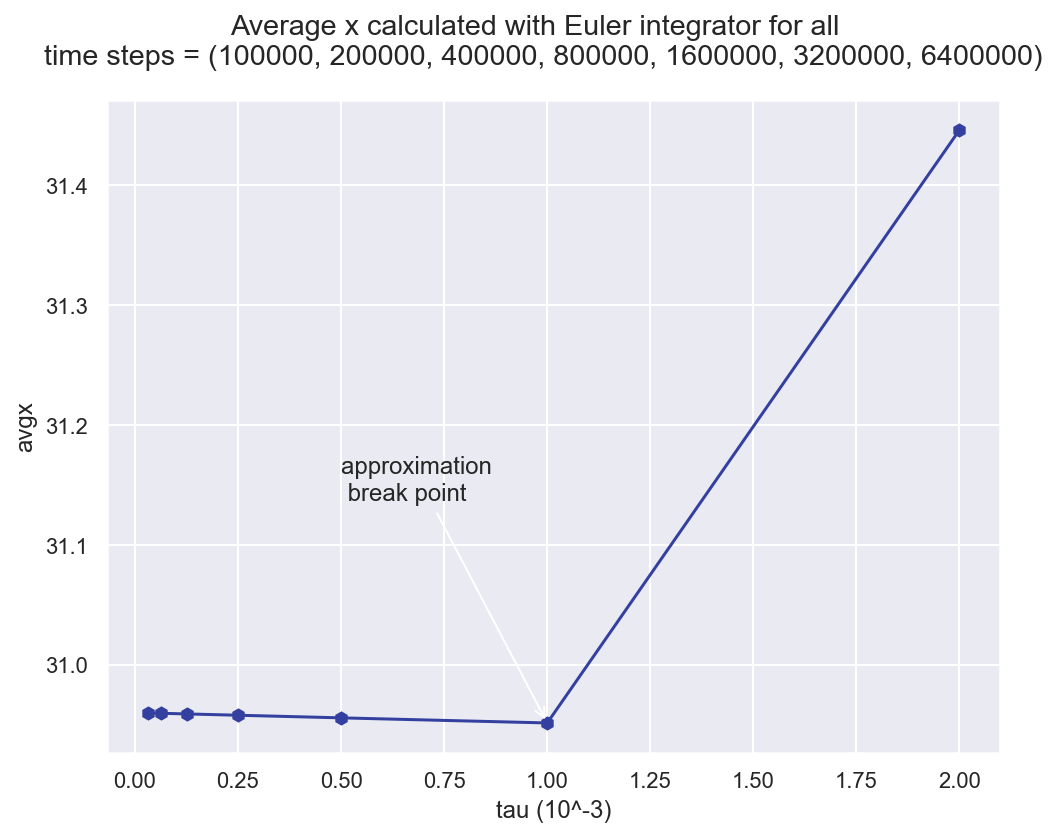

In [774]:
figgg, axxx = plt.subplots(figsize=(8,6))
figgg.suptitle('Average x calculated with Euler integrator for all \n time steps = (100000, 200000, 400000, 800000, 1600000, 3200000, 6400000)')

# print(type(axxx))
axxx.plot(euler_obs_df.Tau*10**3, euler_obs_df.averx, label='avgx', color='#3340a0', marker='h')
axxx.set(xlabel='tau (10^-3)', ylabel='avgx')
axxx.annotate('approximation \n break point', xy=(1, euler_obs_df['averx'].values[1]), xytext=(0.5, euler_obs_df['averx'].values[1]+euler_obs_df['averx'].values[1]*0.006), arrowprops=dict(arrowstyle='->'))

figgg.savefig('../plots/avg x all data points - approx bp.pdf')
plt.show()

## Accuracy study for Conj Grad of UCNM

In [917]:
accuracy = [4, 8, 10, 11, 12]
nstepsss = [200000, 400000, 800000]

# datlist200k = [pd.read_csv('../data/gauss_wf_accuracy1e-{}_wall6_129_200_200000_1_3_30_6_1_1000.txt'.format(a), sep='\t') for a in accuracy]
# datlist400k = [pd.read_csv('../data/gauss_wf_accuracy1e-{}_wall6_129_200_400000_1_3_30_6_1_1000.txt'.format(a), sep='\t') for a in accuracy]
# datlist800k = [pd.read_csv('../data/gauss_wf_accuracy1e-{}_wall6_129_200_800000_1_3_30_6_1_1000.txt'.format(a), sep='\t') for a in accuracy]
obs200k_14 = pd.read_csv('../data/gauss_wf_short_wall6_129_200_200000_1_3_30_6_1_1000.txt', sep='\t')
obs400k_14 = pd.read_csv('../data/gauss_wf_short_wall6_129_200_400000_1_3_30_6_1_1000.txt', sep='\t')
obs800k_14 = pd.read_csv('../data/gauss_wf_short_wall6_129_200_800000_1_3_30_6_1_1000.txt', sep='\t')

obs200k_14 = obs200k_14.iloc[[-1]]
obs400k_14 = obs400k_14.iloc[[-1]]
obs800k_14 = obs800k_14.iloc[[-1]]

obs200k_14['accuracy'] = 10**(-14)
obs200k_14['nsteps'] = 200000
obs200k_14['Tau'] = 200/nstepsss[0]
obs400k_14['accuracy'] = 10**(-14)
obs400k_14['nsteps'] = 400000
obs200k_14['Tau'] = 200/nstepsss[1]
obs800k_14['accuracy'] = 10**(-14)
obs800k_14['nsteps'] = 800000
obs200k_14['Tau'] = 200/nstepsss[2]

obs200k_df = create_timecheck_df_acc(nstepsss[0], accuracy, 200, 1, 1000)
obs400k_df = create_timecheck_df_acc(nstepsss[0], accuracy, 200, 1, 1000)
obs800k_df = create_timecheck_df_acc(nstepsss[0], accuracy, 200, 1, 1000)

obs200k_df = obs200k_df.append(obs200k_14, ignore_index=True)
obs400k_df = obs400k_df.append(obs400k_14, ignore_index=True)
obs800k_df = obs800k_df.append(obs800k_14, ignore_index=True)


x = obs200k_df['accuracy'].values[0]
x
obs200k_df.info()
obs200k_df

../data/gauss_wf_accuracy1e-4_wall6_129_200_200000_1_3_30_6_1_1000.txt
../data/gauss_wf_accuracy1e-8_wall6_129_200_200000_1_3_30_6_1_1000.txt
../data/gauss_wf_accuracy1e-10_wall6_129_200_200000_1_3_30_6_1_1000.txt
../data/gauss_wf_accuracy1e-11_wall6_129_200_200000_1_3_30_6_1_1000.txt
../data/gauss_wf_accuracy1e-12_wall6_129_200_200000_1_3_30_6_1_1000.txt
../data/gauss_wf_accuracy1e-4_wall6_129_200_200000_1_3_30_6_1_1000.txt
../data/gauss_wf_accuracy1e-8_wall6_129_200_200000_1_3_30_6_1_1000.txt
../data/gauss_wf_accuracy1e-10_wall6_129_200_200000_1_3_30_6_1_1000.txt
../data/gauss_wf_accuracy1e-11_wall6_129_200_200000_1_3_30_6_1_1000.txt
../data/gauss_wf_accuracy1e-12_wall6_129_200_200000_1_3_30_6_1_1000.txt
../data/gauss_wf_accuracy1e-4_wall6_129_200_200000_1_3_30_6_1_1000.txt
../data/gauss_wf_accuracy1e-8_wall6_129_200_200000_1_3_30_6_1_1000.txt
../data/gauss_wf_accuracy1e-10_wall6_129_200_200000_1_3_30_6_1_1000.txt
../data/gauss_wf_accuracy1e-11_wall6_129_200_200000_1_3_30_6_1_1000.tx

,time,REAL(psi[n]),IMAG(psi[n]),averx,deltax,averp,deltap,avg_state_energy,norm(psi),accuracy,nsteps,Tau
0,200.0,1.000000e-07,0.0,31.584103,10.598519,-0.816772,0.157663,0.191121,0.993744,1.000000e-04,200000,0.00100
1,200.0,1.000000e-07,0.0,30.960229,8.273897,-0.832589,0.109512,0.196313,1.000000,1.000000e-08,200000,0.00100
2,200.0,1.000000e-07,0.0,30.960229,8.273897,-0.832589,0.109512,0.196313,1.000000,1.000000e-10,200000,0.00100
3,200.0,1.000000e-07,0.0,30.960229,8.273897,-0.832589,0.109512,0.196313,1.000000,1.000000e-11,200000,0.00100
4,200.0,1.000000e-07,0.0,30.960229,8.273897,-0.832589,0.109512,0.196313,1.000000,1.000000e-12,200000,0.00100
5,200.0,0.000000e+00,0.0,30.960229,8.273897,-0.832589,0.109512,0.196313,1.000000,1.000000e-14,200000,0.00025


/opt/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


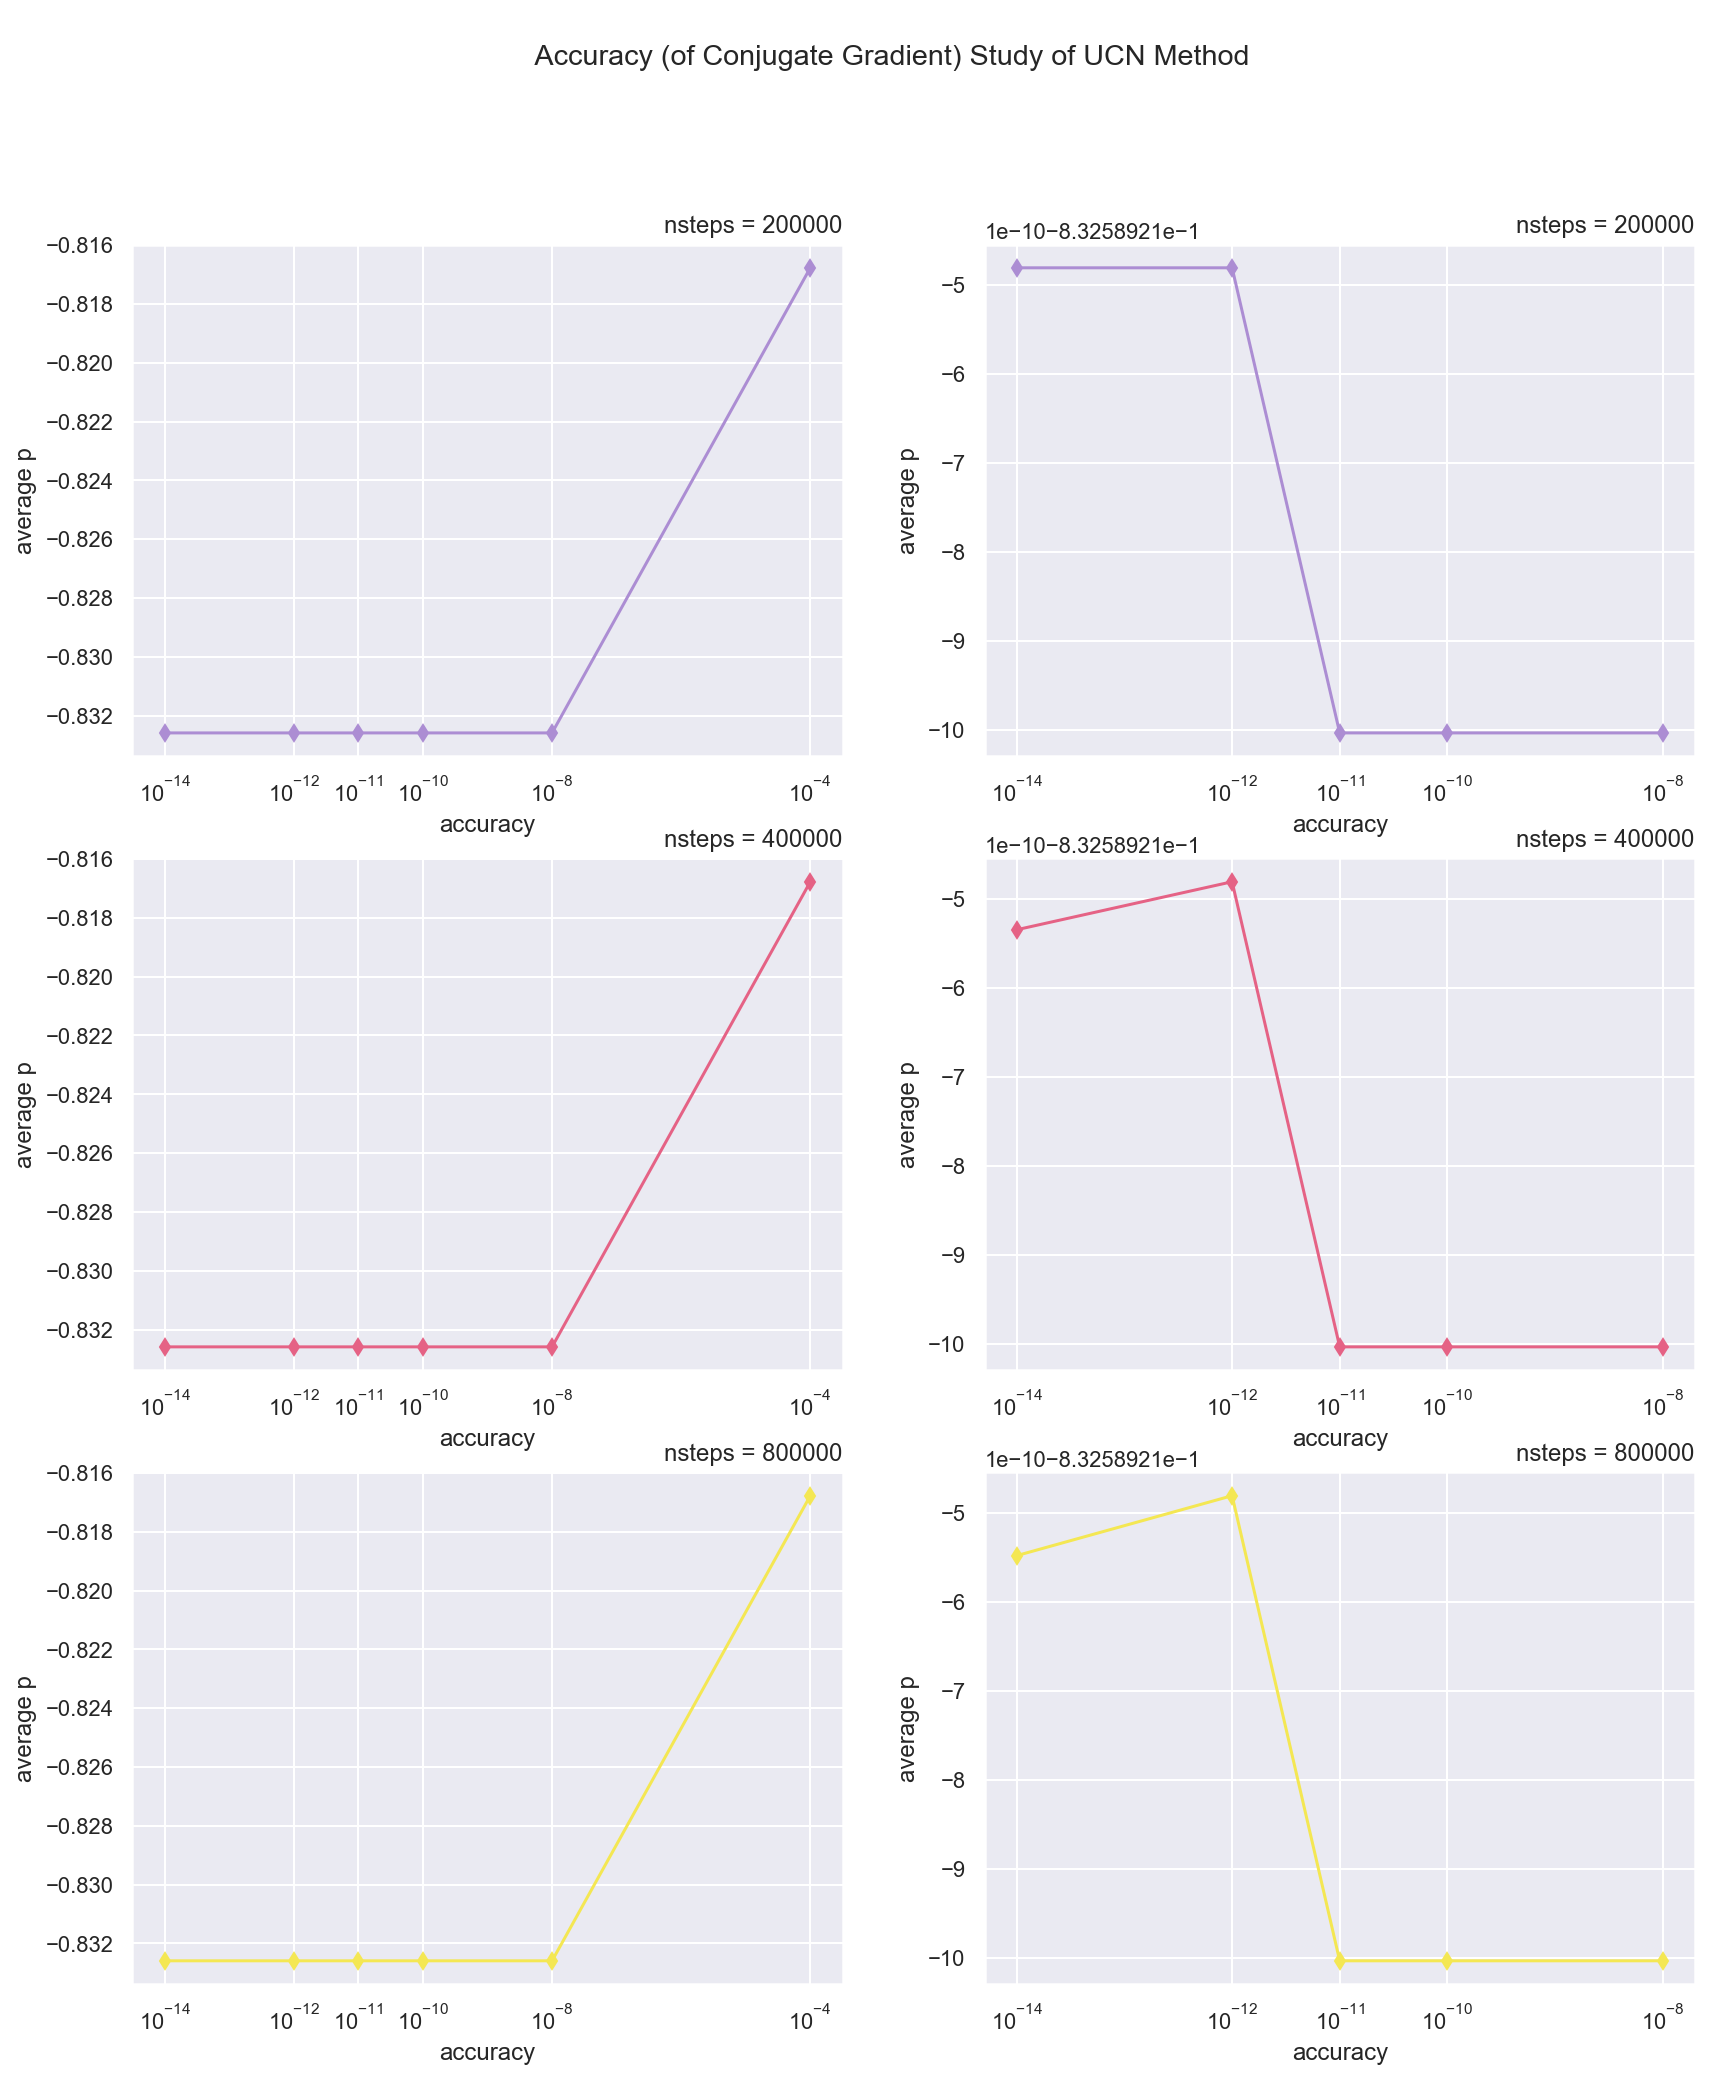

In [922]:
fig = plt.figure(figsize=(14,16))
fig.suptitle('\n Accuracy (of Conjugate Gradient) Study of UCN Method')
# fig.tight_layout(h_pad=3, w_pad=3)
# colorlist = ['#040670', '#ac8dd3', '#e56285', '#a4f4c1', '#f4e753']


axi = plt.subplot(321)

axi.plot(obs200k_df.accuracy[:], obs200k_df.averp[:], color='#ac8dd3', marker='d')
axi.set(xlabel='accuracy', ylabel='average p', xscale='log', xticks=obs200k_df.accuracy)
axi.set_title('nsteps = 200000', loc='right')
# axi.legend()

axii = plt.subplot(323)
axii.plot(obs400k_df.accuracy[:], obs400k_df.averp[:], color='#e56285', marker='d')
axii.set(xlabel='accuracy', ylabel='average p', xscale='log', xticks=obs200k_df.accuracy)
axii.set_title('nsteps = 400000', loc='right')
# axii.legend()

axiii = plt.subplot(325)
axiii.plot(obs800k_df.accuracy[:], obs800k_df.averp[:], color='#f4e753', marker='d')
axiii.set(xlabel='accuracy', ylabel='average p', xscale='log', xticks=obs200k_df.accuracy)
axiii.set_title('nsteps = 800000', loc='right')
# axiii.legend()

axiv = plt.subplot(322)
axiv.plot(obs200k_df.accuracy[1:], obs200k_df.averp[1:], color='#ac8dd3', marker='d')
axiv.set(xlabel='accuracy', ylabel='average p', xscale='log', xticks=obs200k_df.accuracy[1:])
axiv.set_title('nsteps = 200000', loc='right')
# axiv.legend()

axiiv = plt.subplot(324)
axiiv.plot(obs400k_df.accuracy[1:], obs400k_df.averp[1:], color='#e56285', marker='d')
axiiv.set(xlabel='accuracy', ylabel='average p', xscale='log', xticks=obs200k_df.accuracy[1:])
axiiv.set_title('nsteps = 400000', loc='right')
# axiiv.legend()

axiiiv = plt.subplot(326)
axiiiv.plot(obs800k_df.accuracy[1:], obs800k_df.averp[1:], color='#f4e753', marker='d')
axiiiv.set(xlabel='accuracy', ylabel='average p', xscale='log', xticks=obs200k_df.accuracy[1:])
axiiiv.set_title('nsteps = 800000', loc='right')
# axiiiv.legend()

fig.savefig('../plots/average p over accuracy for UCM.png', dpi=300)
fig.show()

## Other stuff

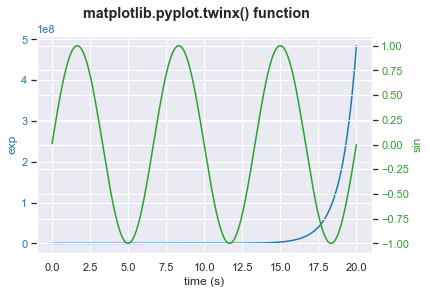

In [7]:
# Create some mock data 
t = np.arange(0.01, 20.0, 0.001) 
data1 = np.exp(t) 
data2 = np.sin(0.3 * np.pi * t) 
   
fig, ax1 = plt.subplots() 
   
color = 'tab:blue'
ax1.set_xlabel('time (s)') 
ax1.set_ylabel('exp', color = color) 
ax1.plot(t, data1, color = color) 
ax1.tick_params(axis ='y', labelcolor = color) 
   
ax2 = ax1.twinx() 
   
color = 'tab:green'
ax2.set_ylabel('sin', color = color) 
ax2.plot(t, data2, color = color) 
ax2.tick_params(axis ='y', labelcolor = color) 
  
fig.suptitle('matplotlib.pyplot.twinx() function ', fontweight ="bold") 

plt.show() 

In [59]:
x = np.array([0.003, 0.004, 0.005, 0.006])
y = x/60
y
steps = 1/y
steps


array([20000., 15000., 12000., 10000.])

### Printing time evolution of SSM with short time 0.15

In [493]:
# data1 = pd.read_csv("../data/gauss_wf_short_wall6_129_0.15_1600000_2_3_30_6_1.txt".format(i), sep="\t")
# data2 = pd.read_csv("../data/gauss_wf_short_wall6_129_0.15_800000_2_3_30_6_1.txt".format(i), sep="\t")
# data3 = pd.read_csv("../data/gauss_wf_short_wall6_129_0.15_400000_2_3_30_6_1.txt".format(i), sep="\t")

# data1 = pd.read_csv("../data/gauss_wf_fixed_wall6_129_1_800000_2_3_30_6_1.txt".format(i), sep="\t")
# data2 = pd.read_csv("../data/gauss_wf_fixed_wall6_129_1_400000_2_3_30_6_1.txt".format(i), sep="\t")
# data3 = pd.read_csv("../data/gauss_wf_fixed_wall6_129_1_200000_2_3_30_6_1.txt".format(i), sep="\t")
# data3 = pd.read_csv("../data/gauss_wf_fixed_wall6_129_1_100000_2_3_30_6_1.txt".format(i), sep="\t")
# data4 = pd.read_csv("../data/gauss_wf_fixed_wall6_129_1_50000_2_3_30_6_1.txt".format(i), sep="\t")
# data5 = pd.read_csv("../data/gauss_wf_fixed_wall6_129_1_25000_2_3_30_6_1.txt".format(i), sep="\t")

nnsteps = [100000, 200000, 400000, 800000, 1600000, 3200000, 6400000]
data_list = [pd.read_csv("../data/gauss_wf_short_wall6_129_200_{}_2_3_30_6_1_1000.txt".format(i), sep='\t') for i in nnsteps]

data_list[0].head()
# data_list[0].info()

,time,REAL(psi[n]),IMAG(psi[n]),averx,deltax,averp,deltap,avg_state_energy,norm(psi)
0,0.0,0.0,0.0,30.000006,5.999985,0.838554,0.045058,0.196313,1.0
1,0.2,0.0,0.0,30.071336,5.999987,0.838554,0.045058,0.196313,1.0
2,0.4,0.0,0.0,30.142665,5.999990,0.838554,0.045058,0.196313,1.0
3,0.6,0.0,0.0,30.213995,5.999997,0.838554,0.045058,0.196313,1.0
4,0.8,0.0,0.0,30.285325,6.000005,0.838554,0.045058,0.196313,1.0


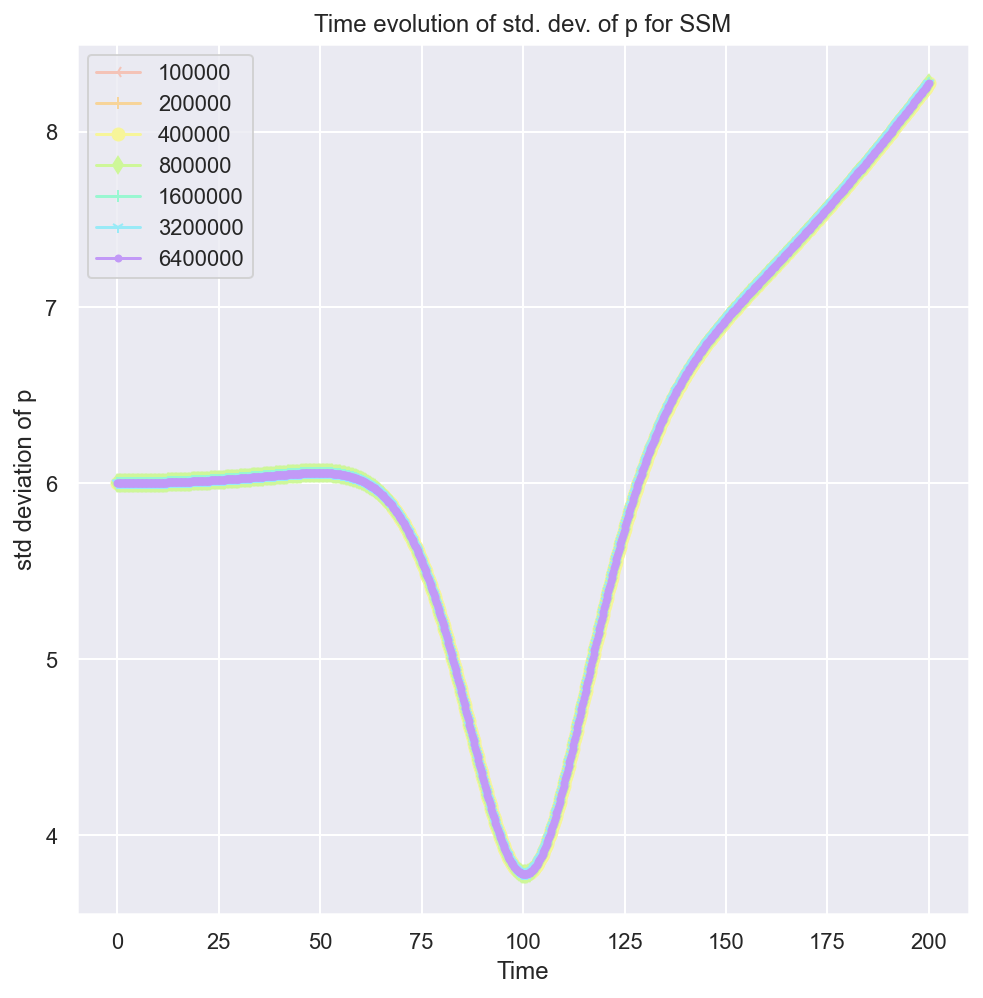

In [507]:
fig = plt.figure(figsize=(8, 8))
color_list = ['#f4c3b7' ,'#f7d499', '#f7f599', '#cef799', '#99f7d1', '#99eaf7', '#c299f7' ]
label_list = ['100000', '200000', '400000', '800000', '1600000', '3200000', '6400000']
marker_list = ['3', '+', 'o', 'd', '|', '1', '.']
for i in range(len(nnsteps)):
    plt.plot(data_list[i].time, data_list[i].deltax, label=label_list[i], color=color_list[i], marker=marker_list[i])
    
plt.xlabel('Time')
plt.ylabel('std deviation of p')
plt.title('Time evolution of std. dev. of p for SSM')
plt.legend()
plt.savefig('../plots/time ev of delta p SSM all tau.png', dpi=300)
plt.show()

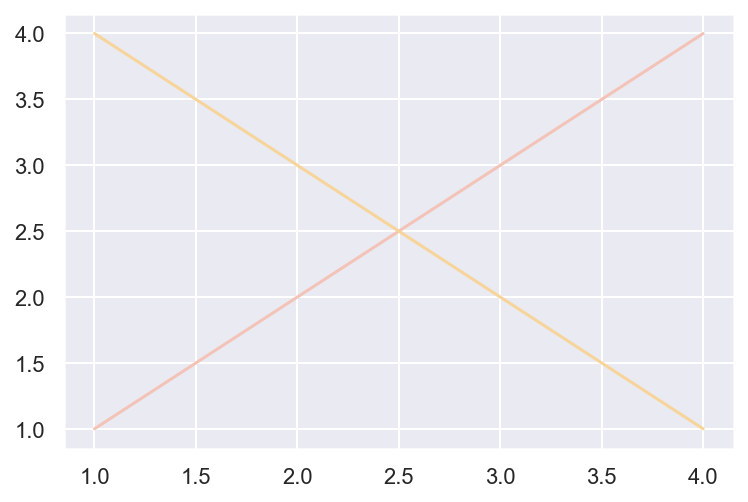

In [502]:
x = [1, 2, 3, 4]
y = [x*1, [4, 3, 2, 1]]

collist = ['#f4c3b7' ,'#f7d499']
for i in (0, 1):
    plt.plot(x, y[i], color=collist[i])
    
plt.show()

In [204]:
# arr1 = data1[np.mod(np.arange(data1.index.size),10000)==0]
# # arr = np.mod(np.arange(data.index.size),1000)
# # arr.size
# arr1.info()

# arr2 = data2[np.mod(np.arange(data2.index.size),10000)==0]
# arr3 = data3[np.mod(np.arange(data3.index.size),10000)==0]
# arr2.info()
# arr = np.mod(np.arange(data1.index.size),1000)
# arr
# arr1

# data1 = data1[np.mod(np.arange(data1.index.size),10000)==0]
# data2 = data2[np.mod(np.arange(data2.index.size),10000)==0]
# data3 = data3[np.mod(np.arange(data3.index.size),10000)==0]


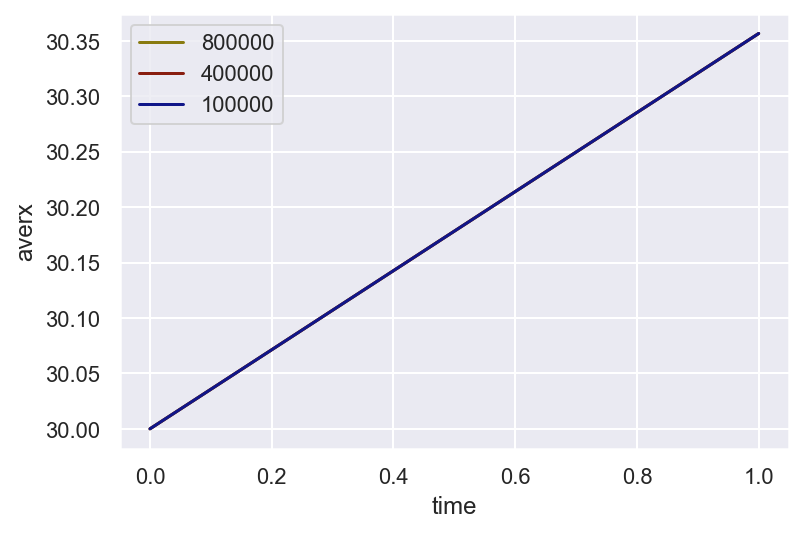

In [373]:
label1 = '800000'
label2 = '400000'
label3 = '200000'
label3 = '100000'
label4 = '50000'
label5 = '25000'

sns.set_theme()

plt.plot(data1['time'], data1['averx'], label=label1, color='#897b10')
plt.plot(data2.time, data2['averx'], label=label2, color='#891e10')
plt.plot(data3.time, data3['averx'], label=label3, color='#101689')

plt.xlabel('time')
plt.ylabel('averx')

plt.legend()
plt.title('3 nsteps with values total time: 0.15, SSM, 30_6_1 \n printed every 10000th step')
# plt.savefig('../plots/3 nsteps with values total time 0.15 SSM every 1000th step.png', dpi=300)
plt.show()

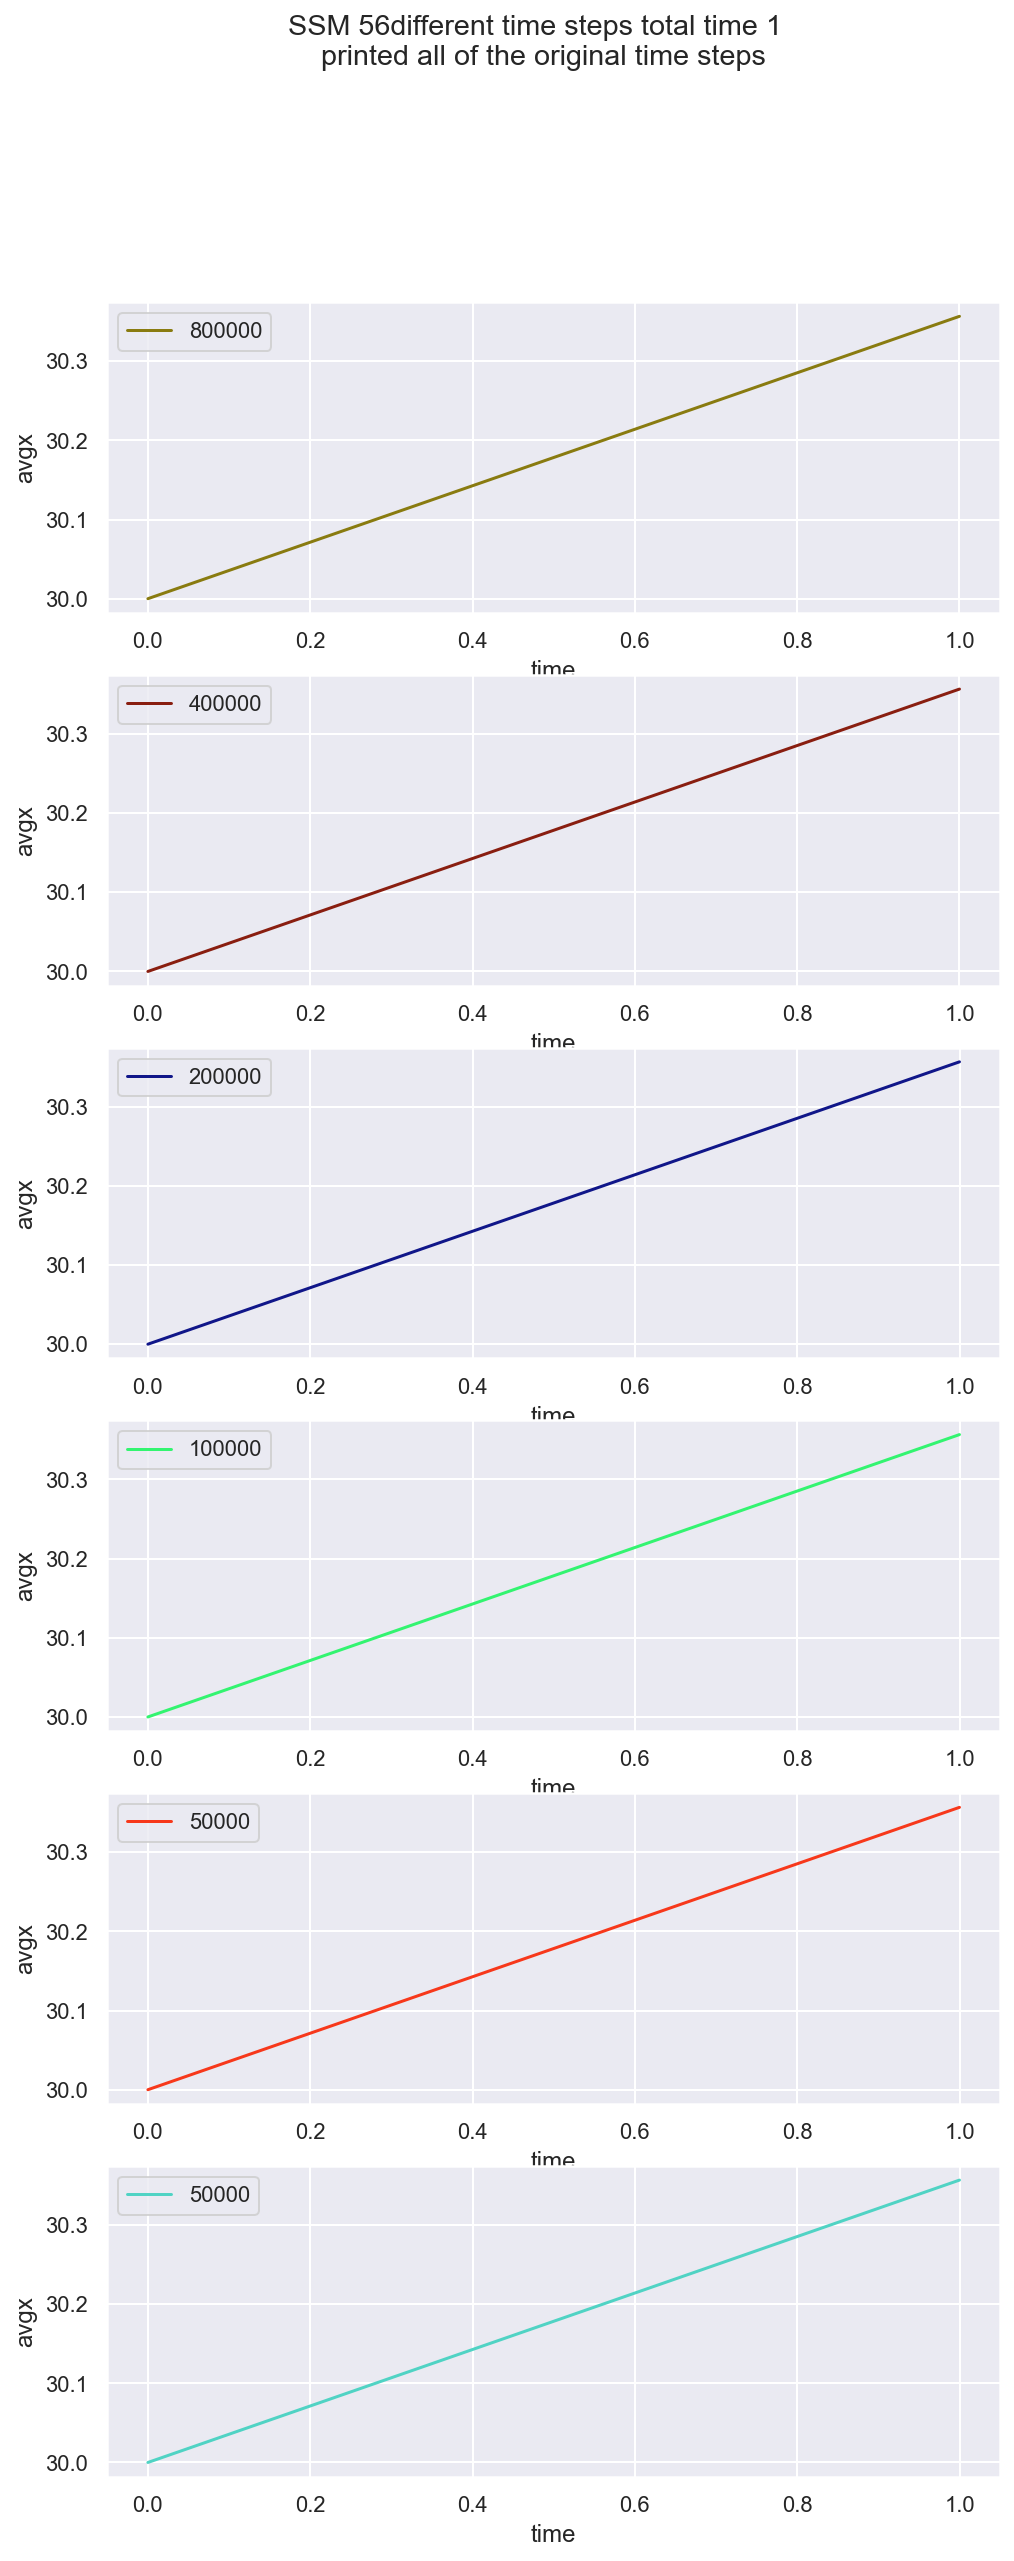

In [222]:
sns.set_theme()

fig = plt.figure(figsize=(8,20))
fig.suptitle('SSM 56different time steps total time 1 \n printed all of the original time steps')

ax1 = plt.subplot(611)
ax1.plot(data1.time, data1.averx, label='800000', color='#897b10')
ax1.set_xlabel('time')
ax1.set_ylabel('avgx')
# ax1.set_title('nsteps 1600000')
ax1.legend()

ax2 = plt.subplot(612)
ax2.plot(data2.time, data2.averx, label='400000', color='#891e10')
ax2.set_xlabel('time')
ax2.set_ylabel('avgx')
# ax2.set_title('nsteps 800000')
ax2.legend()

ax3 = plt.subplot(613)
ax3.plot(data3.time, data3.averx, label='200000', color='#101689')
ax3.set_xlabel('time')
ax3.set_ylabel('avgx')
# ax3.set_title('nsteps 400000')
# ax3.set_xscale('log')
ax3.legend()

ax3 = plt.subplot(614)
ax3.plot(data3.time, data3.averx, label='100000', color='#33f470')
ax3.set_xlabel('time')
ax3.set_ylabel('avgx')
ax3.legend()

ax3 = plt.subplot(615)
ax3.plot(data3.time, data3.averx, label='50000', color='#f7381b')
ax3.set_xlabel('time')
ax3.set_ylabel('avgx')
ax3.legend()

ax3 = plt.subplot(616)
ax3.plot(data3.time, data3.averx, label='50000', color='#50d3c4')
ax3.set_xlabel('time')
ax3.set_ylabel('avgx')
ax3.legend()

plt.savefig('../plots/SSM 3 fixed all time steps.png', dpi=500)
# plt.savefig('../plots/SSM 3 of nsteps.png', dpi=300)
plt.show()

### Printing time evolution of Euler for long time 1

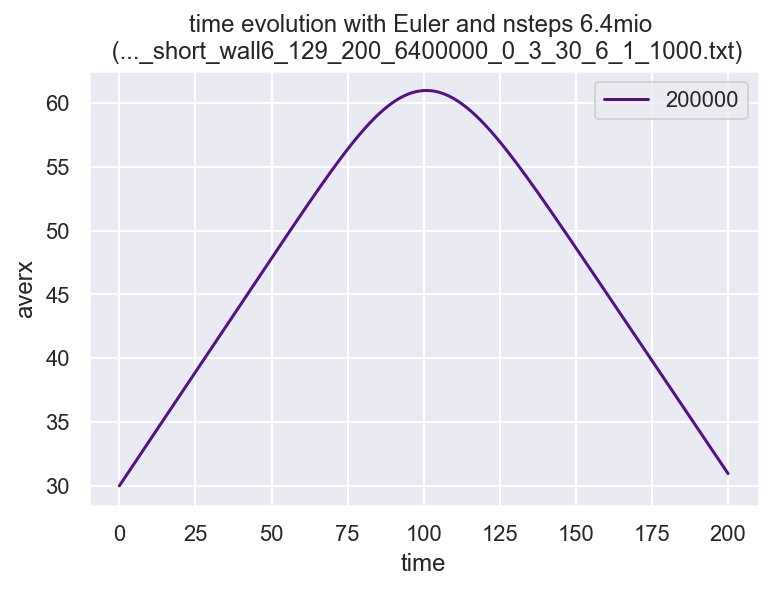

In [492]:
lt_data1 = pd.read_csv("../data/gauss_wf_short_wall6_129_200_6400000_0_3_30_6_1_1000.txt", sep="\t")
# lt_arr1 = lt_data1[np.mod(np.arange(lt_data1.index.size),1000)==0]

# plt.plot(lt_arr1['time'], lt_arr1['averx'], label='200000', color='#551089')
plt.plot(lt_data1['time'], lt_data1['averx'], label='200000', color='#551089')
plt.xlabel('time')
plt.ylabel('averx')
plt.title('time evolution with Euler and nsteps 6.4mio \n (..._short_wall6_129_200_6400000_0_3_30_6_1_1000.txt)')
plt.legend()
plt.show()

In [268]:
# arr = np.arange(0, 100)
# arr = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

skiprows = lambda x: 0 != x%2
print(skiprows(arr))

maparr = map(skiprows(arr), arr)
maparr2 = map(lambda x: 0 != x%2, arr)
print(maparr)
print(maparr2)

filarr = filter(skiprows(arr), arr)
filarr2 = filter(lambda x: 0 != x%2, arr)
print(filarr)
print(filarr2)

In [367]:
# tsteps = [ 12500, 25000, 50000 ,100000, 200000, 400000, 800000, 1600000, 3200000 ]
tsteps = [  50000 ]
# tsteps = [25000]

def keep(x):
    if x==0:
        return True
    if (x-1) % 500 ==0:
        return True

list_of_data = [pd.read_csv("../data/gauss_wf_fixed_wall6_129_1_{}_2_3_30_6_0.025.txt".format(i), sep="\t", header=0 ,skiprows = lambda x: not keep) for i in tsteps ]
# list_of_data = [pd.read_csv("../data/gauss_wf_fixed_wall6_129_1_{}_1_3_30_6_1.txt".format(i), sep="\t") for i in tsteps ]

In [368]:
range(len(list_of_data))
# print(list_of_data[0].head())

len(list_of_data)
for j in range(len(list_of_data)):
    print("NSTEPS {}".format(tsteps[j]))
    print(list_of_data[j].iloc[[1]])
    print(list_of_data[j].iloc[[-1]])

NSTEPS 50000
      time   REAL(psi[n])  IMAG(psi[n])      averx    deltax     averp  \
1  0.00002  2.264966e-314      0.001607  30.000006  5.999985  0.024911   

     deltap  avg_state_energy  norm(psi)  
1  0.083019          0.001607        1.0  
          time   REAL(psi[n])  IMAG(psi[n])      averx    deltax     averp  \
49999  0.99998  2.264966e-314      0.001607  30.010601  6.000089  0.024911   

         deltap  avg_state_energy  norm(psi)  
49999  0.083019          0.001607        1.0  


### Plotting wavefunction

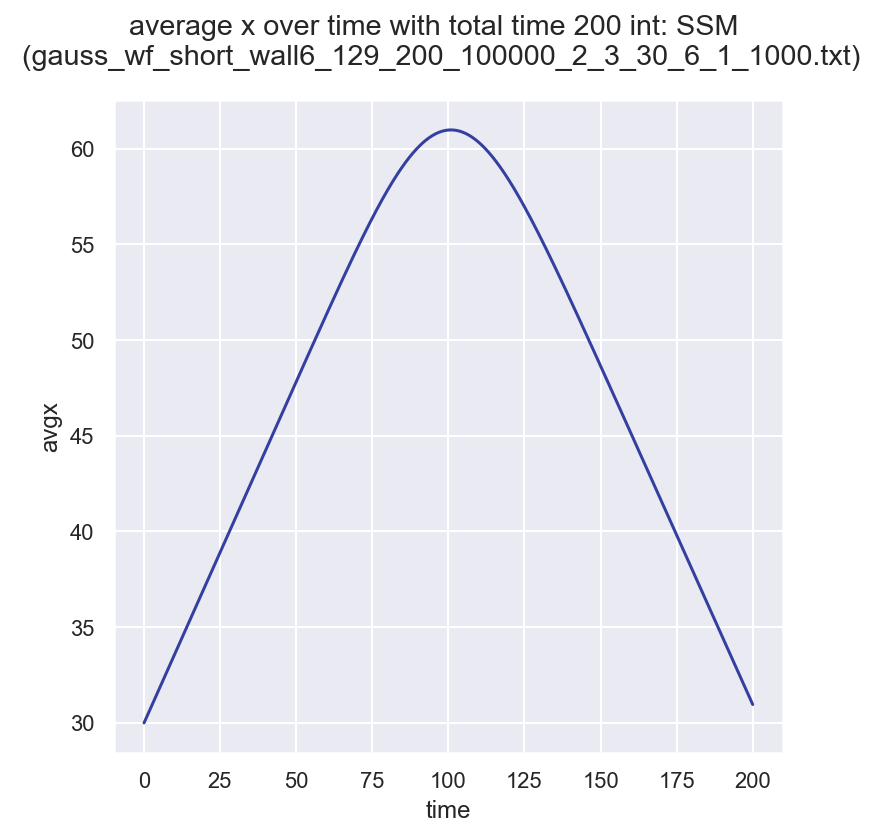

In [489]:
newdat = pd.read_csv('../data/gauss_wf_short_wall6_129_200_100000_2_3_30_6_1_1000.txt', sep='\t')
newdat.head()
fig, ax = plt.subplots(figsize=(6,6))
fig = fig.suptitle('average x over time with total time 200 int: SSM \n (gauss_wf_short_wall6_129_200_100000_2_3_30_6_1_1000.txt)')

ax.plot(newdat.time, newdat.averx, label='avgx', color='#3340a0')
ax.set(xlabel='time', ylabel='avgx')
plt.savefig('../plots/time evolution average x of SSM nsteps 100000.png', dpi=300)
plt.show()